# Examen número 1: Métodos computacionales para físicos - Melanie Andrea Muñoz Chavarria

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia




1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  


a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```


b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.

Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

####**Primer punto**

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [136]:
#a.Función
def caida(t,s0,m,k,g):
  s=s0-(((m*g)/k)*t)+(((m**2)*g)/(k**2))*(1-np.exp((-k*t)/m))
  return s

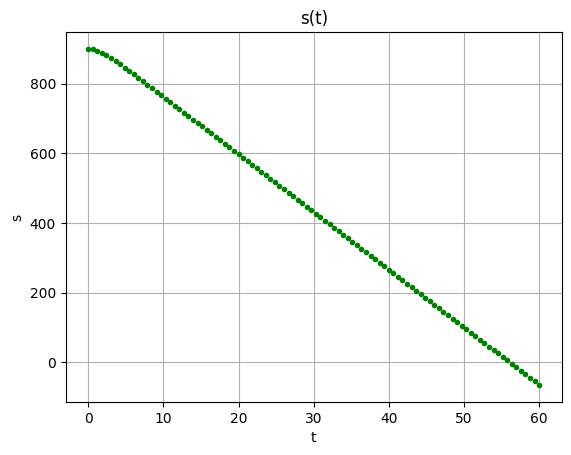

In [137]:
#Gráfico
t_intervalo=np.linspace(0,60,100)

s0=900 #m
m=0.25 #kg
k=0.148 #kg*s/m
g=9.8  #m/s**2

plt.figure()
plt.plot(t_intervalo,caida(t_intervalo,s0,m,k,g),'.g')
plt.title('s(t)')
plt.xlabel('t')
plt.ylabel('s')
plt.grid()

In [142]:
#b.
#Igualando s a cero
#Datos
s0=900 #m
m=0.25 #kg
k=0.148 #kg*s/m
g=9.8  #m/s**2
s=lambda t: s0-(((m*g)/k)*t)+(((m**2)*g)/(k**2))*(1-np.exp((-k*t)/m))
s_derivada= lambda t:-((m*g)/k)+(m*g)/(k)*(np.exp((-k*t)/m)) #Para usar en el método de Newton

In [139]:
#Verificando la derivada
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
f2= lambda t: (((m**2)*g)/(k**2))*(1-sp.exp((-k*t)/m))
# Primera derivada
derivada1=sp.diff(f(t), t, 1)
derivada2=sp.diff(f2(t), t, 1)

derivada1+derivada2

-g*m/k + g*m*exp(-k*t/m)/k

In [143]:
#secante
tiempo_de_caida_secante=optimize.newton(s,30,fprime=None)
print(f'El tiempo de caída por el método de la secante es: {tiempo_de_caida_secante} segundos')

El tiempo de caída por el método de la secante es: 56.056536127964684 segundos


In [144]:
#Newton-Rapshon
tiempo_de_caida_newton=optimize.newton(s,30,fprime=s_derivada)
print(f'El tiempo de caída por el método de Newton-Rapshon es: {tiempo_de_caida_newton} segundos')

El tiempo de caída por el método de Newton-Rapshon es: 56.05653612796469 segundos


In [145]:
#Punto fijo
#Funcion de la identidad menos s(t)
def g(t,s0,m,k,g):
  g=t-caida(t,s0,m,k,g)
  return g

In [146]:
Argumentos=(900,0.25,0.148,9.8)
tiempo_de_caida_punto_fijo=optimize.fixed_point(g,56,args=Argumentos)
print(f'El tiempo de caída por el método de Newton-Rapshon es: {tiempo_de_caida_punto_fijo} segundos')

El tiempo de caída por el método de Newton-Rapshon es: 56.05653612796469 segundos


In [147]:
#c.
#Intervalo de las masas
masa_intervalo=np.linspace(0.25,1,10)
#print(len(masa_intervalo))
tiempos_caida_diferentes_masas=np.zeros(len(masa_intervalo))

#Valores para el args
s0=900 #m
k=0.148 #kg*s/m
g=9.8  #m/s**2

contador=0 #Para poder reemplazar los ceros del array por el resultado

#Iteración para concer los distintos valores de la masas
for masa in masa_intervalo:
  tiempo_caida=optimize.newton(caida, 30, args=(s0,masa,k,g))
  #print(tiempo_caida)
  tiempos_caida_diferentes_masas[contador]= tiempo_caida
  contador=contador +1

#print(tiempos_caida_diferentes_masas)

#Para imprimir las masas con sus respectivos tiempos de caida
for i in range(0, len(masa_intervalo)):
  print(f'Para la masa: {masa_intervalo[i]} kg, se tiene un tiempo de caída de: {tiempos_caida_diferentes_masas[i]} segundos')


Para la masa: 0.25 kg, se tiene un tiempo de caída de: 56.056536127964684 segundos
Para la masa: 0.3333333333333333 kg, se tiene un tiempo de caída de: 43.02776244496512 segundos
Para la masa: 0.41666666666666663 kg, se tiene un tiempo de caída de: 35.43571385882114 segundos
Para la masa: 0.5 kg, se tiene un tiempo de caída de: 30.561653766222488 segundos
Para la masa: 0.5833333333333333 kg, se tiene un tiempo de caída de: 27.23780281893051 segundos
Para la masa: 0.6666666666666666 kg, se tiene un tiempo de caída de: 24.87425281398115 segundos
Para la masa: 0.75 kg, se tiene un tiempo de caída de: 23.13730392673936 segundos
Para la masa: 0.8333333333333333 kg, se tiene un tiempo de caída de: 21.824086573786005 segundos
Para la masa: 0.9166666666666666 kg, se tiene un tiempo de caída de: 20.80583965163301 segundos
Para la masa: 1.0 kg, se tiene un tiempo de caída de: 19.99838180981076 segundos


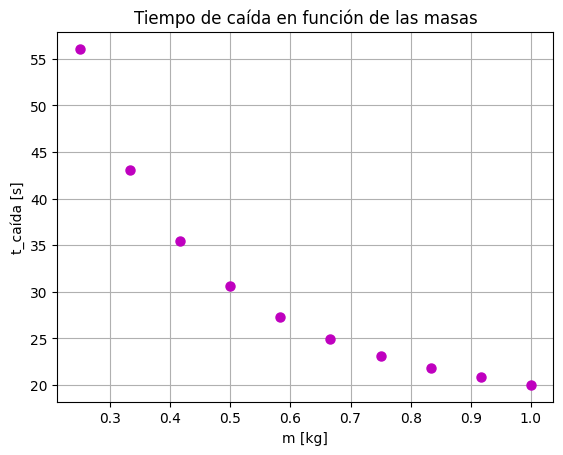

In [148]:
#Grafico del tiempo de caída en función de la masa

plt.figure()
plt.plot(masa_intervalo,tiempos_caida_diferentes_masas, '.m',markersize=13)
plt.title('Tiempo de caída en función de las masas')
plt.ylabel('t_caída [s]')
plt.xlabel('m [kg]')
plt.grid()

2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.
Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

In [149]:
import pandas as pd

In [150]:
#a.
url='https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv'

In [151]:
#Lectura del data set
df=pd.read_csv(url)
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [152]:
#b
#Lista de columnas
lista=(df['Date/Time'], df['Temp_C'],df['Temp_C'],df['Rel Hum_%'],df['Wind Speed_km/h'],df['Visibility_km'],df['Press_kPa'],df['Weather'])
lista

(0          1/1/2012 0:00
 1          1/1/2012 1:00
 2          1/1/2012 2:00
 3          1/1/2012 3:00
 4          1/1/2012 4:00
               ...       
 8779    12/31/2012 19:00
 8780    12/31/2012 20:00
 8781    12/31/2012 21:00
 8782    12/31/2012 22:00
 8783    12/31/2012 23:00
 Name: Date/Time, Length: 8784, dtype: object,
 0      -1.8
 1      -1.8
 2      -1.8
 3      -1.5
 4      -1.5
        ... 
 8779    0.1
 8780    0.2
 8781   -0.5
 8782   -0.2
 8783    0.0
 Name: Temp_C, Length: 8784, dtype: float64,
 0      -1.8
 1      -1.8
 2      -1.8
 3      -1.5
 4      -1.5
        ... 
 8779    0.1
 8780    0.2
 8781   -0.5
 8782   -0.2
 8783    0.0
 Name: Temp_C, Length: 8784, dtype: float64,
 0       86
 1       87
 2       89
 3       88
 4       88
         ..
 8779    81
 8780    83
 8781    93
 8782    89
 8783    86
 Name: Rel Hum_%, Length: 8784, dtype: int64,
 0        4
 1        4
 2        7
 3        6
 4        7
         ..
 8779    30
 8780    24
 8781    28
 8782

In [153]:
#c
# Determinar los elemenntos únicos de la columna Wheater
#for i in df.Weather: #Para iterar sobre la columna
  #for j in i: #Para iterar sobre los valores en la columa
    #if j!=',':
      #print(i)


In [154]:
#d
#Crear un filtro para la columna Wheater cuando toma el valor de "Cloudy"
condicion=(df.Weather=="Cloudy") #Condicion
df_copy=df.loc[condicion]
df_copy

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


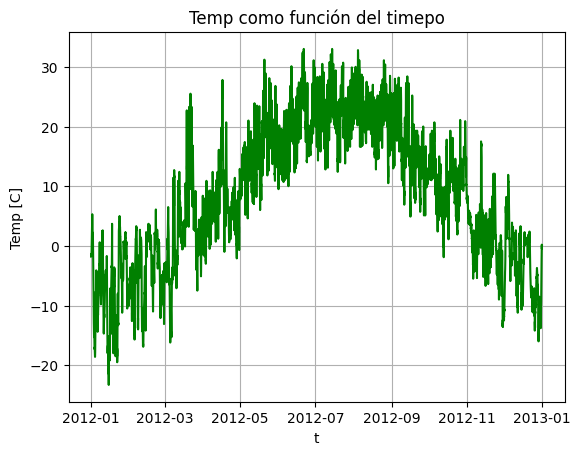

In [155]:
#e
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')

#Grafico Temp_C como función del tiempo
plt.figure()
plt.plot(df['Time'],df['Temp_C'], color='green')
plt.title('Temp como función del timepo')
plt.xlabel('t')
plt.ylabel('Temp [C]')
plt.grid()

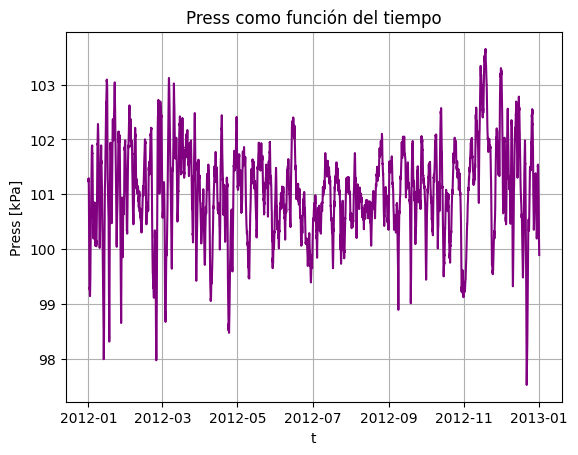

In [156]:
#Grafico Press_kPa como función del tiempo
plt.figure()
plt.plot(df['Time'],df['Press_kPa'], color='purple')
plt.title('Press como función del tiempo')
plt.xlabel('t')
plt.ylabel('Press [kPa]')
plt.grid()